<a id=top-page></a>

<h1>
<center>
→ The effect of trainable vs. non-trainable pure streams
</center>
</h1>

<h3>
<center>
📄 Optimizing progress variables for ammonia/hydrogen combustion using encoding-decoding networks
</center>
</h3>

<center>
K. Zdybał, J. C. Sutherland, A. Parente, Combustion and Flame (2025)
</center>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#cost-function-hp">Specify the cost function's hyper-parameters</a></li>
    <li><a href="#optimized-PV-tps">Parameterization with the optimized PV and `trainable pure streams`</a></li>
    <li><a href="#optimized-PV-ntps">Parameterization with the optimized PV and `non-trainable pure streams`</a></li>
    <li><a href="#f-PV-manifolds">Visualize the $(f, \text{PV})$ manifolds</a></li>
    <li><a href="#Li">Visualize the individual costs, $\mathcal{L}_i$</a></li>
</ol>
<p></p>
</div>
<br>

***

In [1]:
%run -i imports.py
%matplotlib inline

Python==3.10.13

numpy==1.26.2
pandas==2.1.3
scipy==1.11.4
scikit-learn==1.3.2
PCAfold==2.2.0
2.15.0
2.15.0


In [2]:
data_type = 'SLF'
data_tag = 'NH3-H2-air-25perc'
target_variables_indices = [0,1,3,5,6,9]
pure_streams = False

%run -i ../scripts/ammonia-Stagni-load-data.py


Using: T, H2, O2, H2O, OH, NO as target state variables at the decoder output.

24150 observations
26 state variables


<a id=cost-function-hp></a>
***

## Specify the cost function's hyper-parameters

[**Go to the top ↑**](#top-page)

In [3]:
power = 4
vertical_shift = 1
penalty_function = 'log-sigma-over-peak'

<a id=optimized-PV-tps></a>

***

## Parameterization with the optimized PV and `trainable pure streams`

[**Go to the top ↑**](#top-page)

In [4]:
random_seeds_list = [i for i in range(0,20)]

In [5]:
costs_L2_RN = []

for random_seed in random_seeds_list:
    variance_data = pickle.load(open('../results-paper/f-PV-tps-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NO-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-VD-for-T-H2-H-O2-O-H2O-OH-H2O2-NO-N2O-NO2-NH2-PV-source-rs-' + str(random_seed) + '.pkl', 'rb'))
    costs = analysis.cost_function_normalized_variance_derivative(variance_data,
                                                                  penalty_function=penalty_function,
                                                                  norm=None,
                                                                  power=power,
                                                                  vertical_shift=vertical_shift,
                                                                  integrate_to_peak=False)
     
    costs_L2_RN.append(np.linalg.norm(costs)/len(costs))

In [6]:
idx_optimized_basis, = np.where(costs_L2_RN==np.min(costs_L2_RN))
idx_optimized_basis

array([10])

In [7]:
VarianceData_optimized = pickle.load(open('../results-paper/f-PV-tps-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NO-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-VD-for-T-H2-H-O2-O-H2O-OH-H2O2-NO-N2O-NO2-NH2-PV-source-rs-' + str(idx_optimized_basis[0]) + '.pkl', 'rb'))

In [8]:
sigmas_optimized_tps = VarianceData_optimized.bandwidth_values
D_hat_optimized_tps = analysis.normalized_variance_derivative(VarianceData_optimized)

In [9]:
costs_optimized_tps = analysis.cost_function_normalized_variance_derivative(VarianceData_optimized,
                                                              penalty_function=penalty_function,
                                                              norm=None,
                                                              power=power,
                                                              vertical_shift=vertical_shift,
                                                              integrate_to_peak=False)

L2_norm_cost_optimized_tps = np.linalg.norm(costs_optimized_tps)/len(costs_optimized_tps)
L2_norm_cost_optimized_tps

0.37640366657535396

<a id=optimized-PV-ntps></a>

***

## Parameterization with the optimized PV and `non-trainable pure streams`

[**Go to the top ↑**](#top-page)

In [10]:
random_seeds_list = [i for i in range(0,20)]

In [11]:
costs_L2_RN = []

for random_seed in random_seeds_list:
    variance_data = pickle.load(open('../results-paper/f-PV-ntps-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NO-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-VD-for-T-H2-H-O2-O-H2O-OH-H2O2-NO-N2O-NO2-NH2-PV-source-rs-' + str(random_seed) + '.pkl', 'rb'))
    costs = analysis.cost_function_normalized_variance_derivative(variance_data,
                                                                  penalty_function=penalty_function,
                                                                  norm=None,
                                                                  power=power,
                                                                  vertical_shift=vertical_shift,
                                                                  integrate_to_peak=False)
     
    costs_L2_RN.append(np.linalg.norm(costs)/len(costs))

In [12]:
idx_optimized_basis, = np.where(costs_L2_RN==np.min(costs_L2_RN))
idx_optimized_basis

array([15])

In [13]:
model_weights_filename = '../results-paper/f-PV-ntps-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NO-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-best-model-weights-rs-' + str(idx_optimized_basis[0]) + '.h5'

In [14]:
hf = h5py.File(model_weights_filename, 'r')
optimized_basis = np.array(hf.get('0'))
hf.close()

In [15]:
PV_optimized = np.dot(state_space[:,1::], optimized_basis)
PV_optimized_source = np.dot(state_space_sources[:,1::], optimized_basis)

In [16]:
VarianceData_optimized = pickle.load(open('../results-paper/f-PV-ntps-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NO-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-VD-for-T-H2-H-O2-O-H2O-OH-H2O2-NO-N2O-NO2-NH2-PV-source-rs-' + str(idx_optimized_basis[0]) + '.pkl', 'rb'))

In [17]:
sigmas_optimized = VarianceData_optimized.bandwidth_values
D_hat_optimized = analysis.normalized_variance_derivative(VarianceData_optimized)

In [18]:
costs_optimized = analysis.cost_function_normalized_variance_derivative(VarianceData_optimized,
                                                              penalty_function=penalty_function,
                                                              norm=None,
                                                              power=power,
                                                              vertical_shift=vertical_shift,
                                                              integrate_to_peak=False)

L2_norm_cost_optimized = np.linalg.norm(costs_optimized)/len(costs_optimized)
L2_norm_cost_optimized

0.37146256788842474

<a id=f-PV-manifolds></a>
***

## Visualize the $(f, \text{PV})$ manifolds

[**Go to the top ↑**](#top-page)

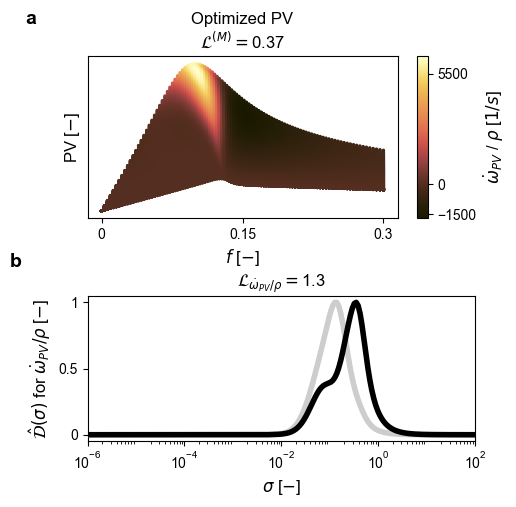

In [19]:
figure = plt.figure(figsize=(5, 5))
spec = figure.add_gridspec(ncols=1, nrows=3, width_ratios=[1], height_ratios=[1,0.2,0.9])

cmap = cmc.lajolla

fontsize = 12
fontsize_axes = 10
fontsize_subfigures = 14
s = 2

x_pos = -0.2
y_pos = 1.2

hfont = {'fontname':'Arial', 'fontweight':'bold'}

# Manifolds - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
figure_a = figure.add_subplot(spec[0,0])
scat = plt.scatter(mf, PV_optimized, c=PV_optimized_source, s=s, cmap=cmap, zorder=10)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.ylabel('PV [$-$]', fontsize=fontsize, rotation=90)
plt.xticks([0,0.15,0.3], ['0', '0.15', '0.3'], fontsize=fontsize_axes)
plt.yticks([])
plt.title('Optimized PV\n' + '$\mathcal{L}^{(M)} = $' + str(round(L2_norm_cost_optimized, 2)), fontsize=fontsize)
cbar = plt.colorbar(scat, aspect=15, ticks=[-1500, 0, 5500])
cbar.set_label('$\dot{\omega}_{PV}$ / $\\rho$ [$1/s$]', rotation=90, fontsize=fontsize)
plt.text(x_pos,y_pos,'a', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(fontsize_axes)
    
# D-hats - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

import matplotlib.patches as mpatches

figure_a = figure.add_subplot(spec[2,0])
plt.semilogx(sigmas_optimized[1:-1], D_hat_optimized[0]['PV-source'], lw=4, c='k', zorder=10)
plt.semilogx(sigmas_optimized_tps[1:-1], D_hat_optimized_tps[0]['PV-source'], lw=4, c='#cdcdcd', zorder=5)
plt.xticks([10**-6, 10**-4, 10**-2, 10**0, 10**2], fontsize=fontsize_axes)
plt.yticks([0,0.5,1], ['0', '0.5', '1'], fontsize=fontsize_axes)
plt.xlim([10**-6, 10**2])
plt.xlabel('$\sigma$ [$-$]', fontsize=fontsize)
plt.ylabel('$\hat{\mathcal{D}}(\sigma)$ for $\dot{\omega}_{PV} / \\rho$ [$-$]', fontsize=fontsize)
plt.title('$\mathcal{L}_{\dot{\omega}_{PV} / \\rho} = $' + str(round(costs_optimized[-1], 1)), fontsize=fontsize)
plt.text(x_pos,y_pos,'b', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)

plt.savefig('../paper/ntps-parameterizations.png', dpi=500, bbox_inches='tight')

<a id=Li></a>
***

## Visualize the individual costs, $\mathcal{L}_i$

[**Go to the top ↑**](#top-page)

In [20]:
names_neat = ['$T$', '$Y_{H_2}$', '$Y_{H}$', '$Y_{O_2}$', '$Y_{O}$', '$Y_{H_2O}$', '$Y_{OH}$', '$Y_{H_2O_2}$', '$Y_{NO}$', '$Y_{N_2O}$', '$Y_{NO_2}$', '$Y_{NH_2}$', '$\\frac{\dot{\omega}_{PV}}{\\rho}$']

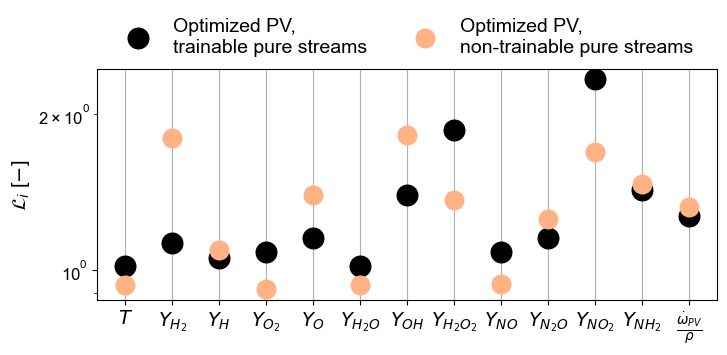

In [21]:
figure = plt.figure(figsize=(8, 3))
spec = figure.add_gridspec(ncols=1, nrows=1, width_ratios=[1], height_ratios=[1])

x_range = [i for i in range(0,len(names_neat))]
fontsize_axes = 12
fontsize = 14
s = 2

figure_a = figure.add_subplot(spec[0,0])
plt.scatter(x_range, costs_optimized_tps, c='k', s=220, zorder=10, label='Optimized PV,\ntrainable pure streams')
plt.scatter(x_range, costs_optimized, c='#ffb384', s=180, zorder=12, label='Optimized PV,\nnon-trainable pure streams')
figure_a.xaxis.grid(True, alpha=1, zorder=1)
figure_a.tick_params(which='minor', labelsize=fontsize_axes)
figure_a.tick_params(which='major', labelsize=fontsize_axes)
plt.xticks(x_range, names_neat, fontsize=fontsize)
plt.ylabel('$\mathcal{L}_i$ [$-$]', fontsize=fontsize)
plt.yscale('log')
plt.legend(frameon=False, fontsize=fontsize, ncol=2, bbox_to_anchor=(0.99,1.3))
plt.savefig('../paper/ntps-costs-collected.pdf', dpi=500, bbox_inches='tight')

***

© K. Zdybał, J. C. Sutherland, A. Parente, Combustion and Flame (2025)